# **Project 1** - Providing Insights on Gun Voilence Data in America

## Participants
1. Sheela Srinivasa
2. Ben Crutchfield
3. Melody Yunchen Zhang
4. Kumar Siddharth


* The main purpose of the project is to provide insight to the gun voilence data using statistics and visualization methods available in Python and available packages like Pandas, matplotlib etc. The dataset was obtained from [http://www.kaggle.com ], but it was originally downloaded from [http://www.gunviolencearchive.org/ ]. The dataset contains records of more than 260k gun voilence incidents in the US between January 2013 and March 2018, inclusive. 

* Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. 



## Import Dependencies

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

## Reading Data into a DataFrame and Checking Usability

In [2]:
file = "../Dataset/gun-violence-data_01-2013_03-2018.csv"
df=pd.read_csv(file)

In [3]:
df['gun_type'].head()

0                       NaN
1                       NaN
2    0::Unknown||1::Unknown
3                       NaN
4    0::Handgun||1::Handgun
Name: gun_type, dtype: object

In [4]:
print(df.loc[0,'participant_age'])
print(df.loc[0,'participant_age_group'])
print(df.loc[0,'participant_gender'])
print(df.loc[0,'participant_relationship'])
print(df.loc[0,'participant_status'])
print(df.loc[0,'participant_type'])
print(df.loc[0,'gun_type'])
print(df.loc[0,'n_guns_involved'])

0::20
0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+
0::Male||1::Male||3::Male||4::Female
nan
0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured
0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect
nan
nan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

# Gun Voilence Incidents by State

In [6]:
incidents_states=df['state'].value_counts()
type(incidents_states)

pandas.core.series.Series

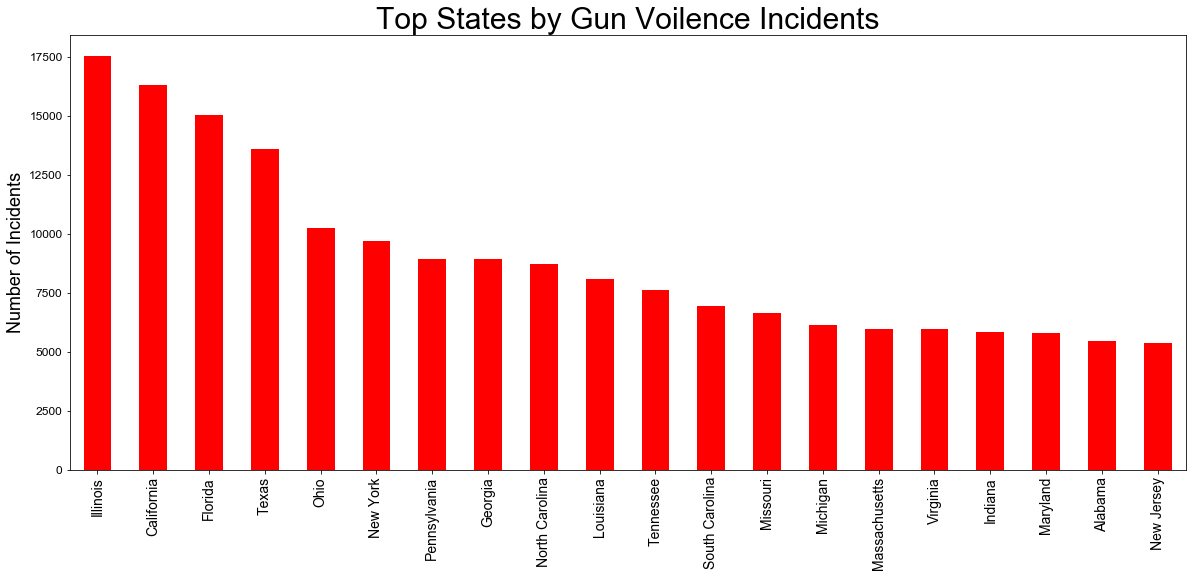

In [7]:
incidents_states.head(20).plot(kind='bar',color='r',figsize=(20,8))
plt.ylabel('Number of Incidents',fontsize=18)
plt.title("Top States by Gun Voilence Incidents",fontsize=30)
plt.xticks(fontsize=14);plt.yticks(fontsize=12)
sns.set()
plt.savefig("Incidents_States")

* State of Illinois tops the dreaded chart. Number of gun voilence incidents = 

* States of California and Florida stand second and third place respectively with Texas not a far off fourth place.

Note that we selected top 30 states (by reported incidents) for the above bar plot.

# Top Cities for Gun Voilence

In [8]:
incidents_cities=df['city_or_county'].value_counts()


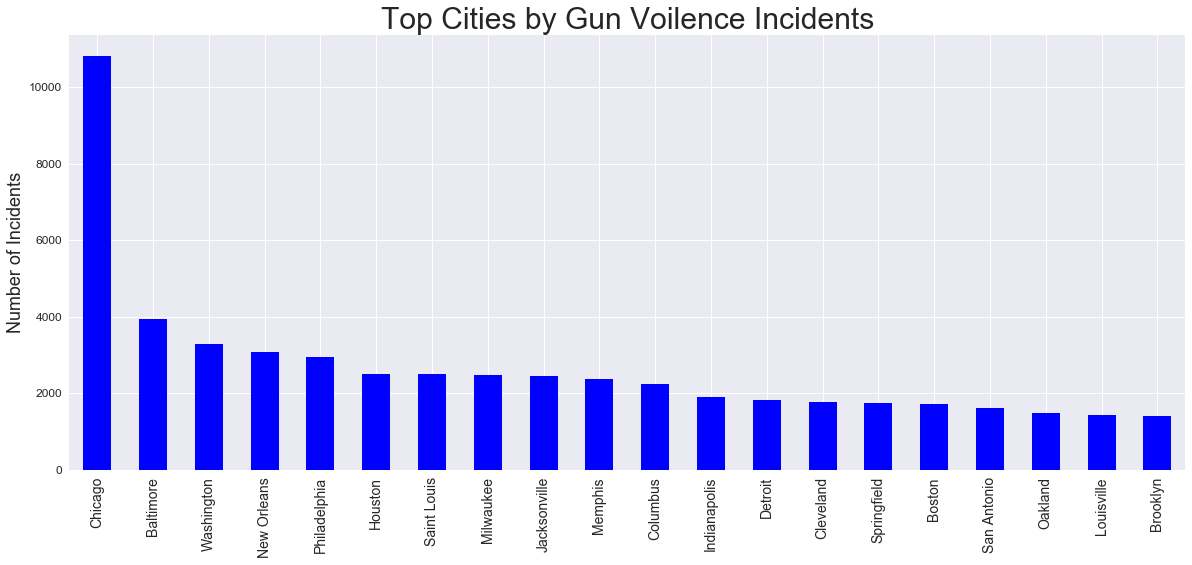

In [9]:
incidents_cities.head(20).plot(kind='bar',color='b',figsize=(20,8))
plt.ylabel('Number of Incidents',fontsize=18)
plt.xticks(fontsize=14);plt.yticks(fontsize=12)
plt.title("Top Cities by Gun Voilence Incidents",fontsize=30)
plt.savefig("Incidents_Cities")

* As can be seen that Chicago takes first spot by large margin (almost three times of the second spot). Total incidents reported in Chicago from January 2013 to march 2018 are ...........
* Baltimore is a distant second with around 4000 incidents reported within that period.

# Number of Killed and Injured Statewise

In [10]:
# help(pd.DataFrame.sort_values)

In [11]:
grped_state = df.groupby('state')
state_agg = grped_state.agg(np.sum)
killed_injured = state_agg[["n_killed","n_injured"]]
killed_injured=killed_injured.sort_values(by='n_killed',ascending=False)
killed_injured.head()

,n_killed,n_injured
state,,
California,5562,7644
Texas,5046,6106
Florida,3909,7072
Illinois,3409,13514
Ohio,2508,5703


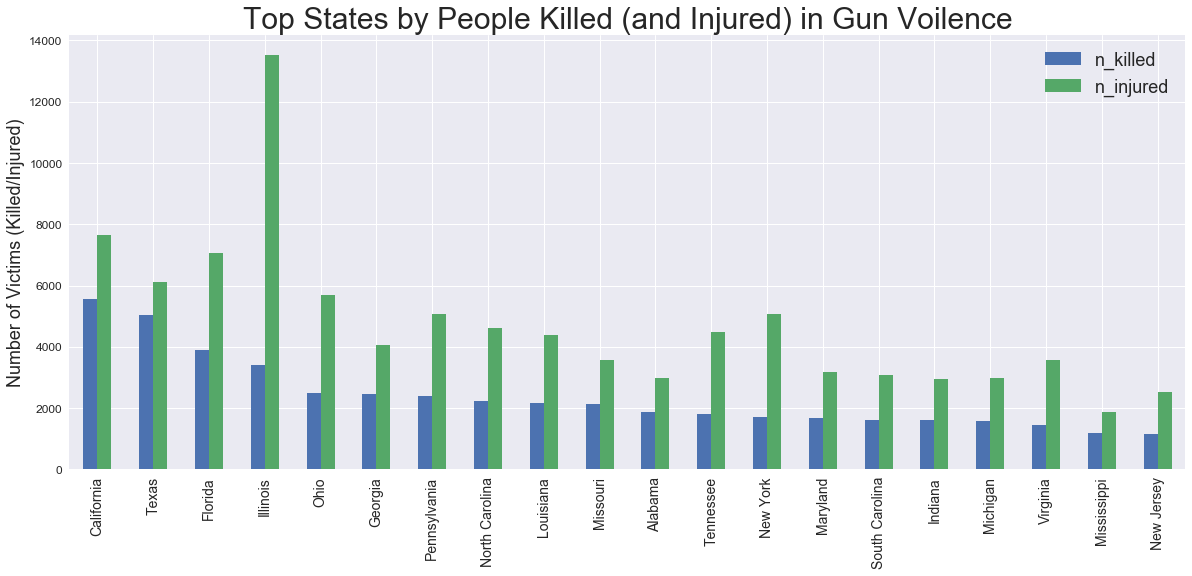

In [12]:
killed_injured.head(20).plot(kind="bar",figsize=(20,8))
plt.ylabel('Number of Victims (Killed/Injured)',fontsize=18)
plt.xticks(fontsize=14);plt.yticks(fontsize=12)
plt.title("Top States by People Killed (and Injured) in Gun Voilence",fontsize=30)
plt.xlabel('')
plt.legend(fontsize=18)
plt.savefig("Victims_States")

* State of California has the highest number of people killed in gun voilence.
* Texas is a close second in terms of fatalities.
* Although Illinois, has the highest number of gun related incidences, but the state does not tops the list of most fatalities. It comes fourth in terms of people killed, has high number of injured though.


# Number of People Killed and Injured Citywise

In [13]:
grped_city = df.groupby('city_or_county')
grped_city_agg = grped_city.agg(np.sum)
victims_city = grped_city_agg[["n_killed","n_injured"]]
victims_city = victims_city.sort_values(by='n_killed',ascending=False)
victims_city.head()

,n_killed,n_injured
city_or_county,,
Chicago,2104,10427
Houston,1145,1255
Baltimore,1055,2427
Saint Louis,919,1783
Philadelphia,901,2326


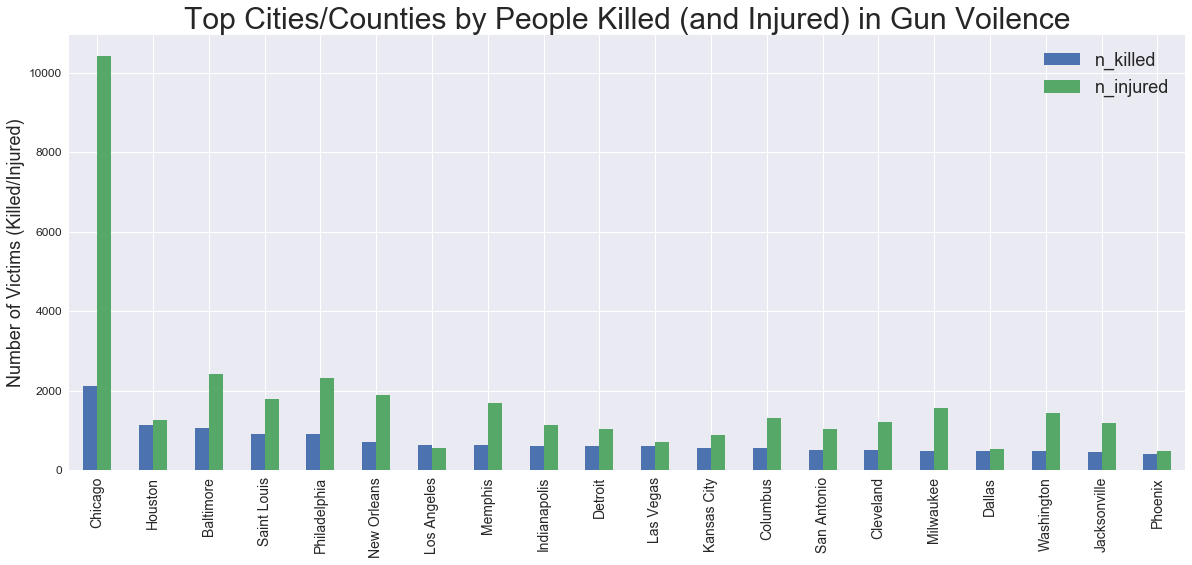

In [14]:
victims_city.head(20).plot(kind='bar',figsize=(20,8))
plt.ylabel('Number of Victims (Killed/Injured)',fontsize=18)
plt.xticks(fontsize=14);plt.yticks(fontsize=12)
plt.title("Top Cities/Counties by People Killed (and Injured) in Gun Voilence",fontsize=30)
plt.xlabel('')
plt.legend(fontsize=18)
plt.savefig("Incidents_Cities")

* City of Chicago clearly stands our. More than 50% of fatalities from gun voilence in state of Illinois happen in Chicago. Around 80% of injured in State of Illinois were injured in Chicago. 
* City of Houston accounts around 20% of all fatalities in state of texas.

# More Investigation of State of Texas

* Since we are in Texas, we went ahead for further investigation of the state in terms of gun voilence
* Lets study, gun fatalities and injuries by cities in Texas.

In [15]:
# separate texas from grouped by state df
df_texas = grped_state.get_group('Texas')
grped_tex_city = df_texas.groupby('city_or_county')
tex_city_agg = grped_tex_city.agg(np.sum)
tex_city = tex_city_agg[['n_killed','n_injured']]
tex_city = tex_city.sort_values('n_killed',ascending=False)
tex_city.head()

,n_killed,n_injured
city_or_county,,
Houston,1144,1245
San Antonio,516,1027
Dallas,465,515
Fort Worth,223,256
Austin,129,196


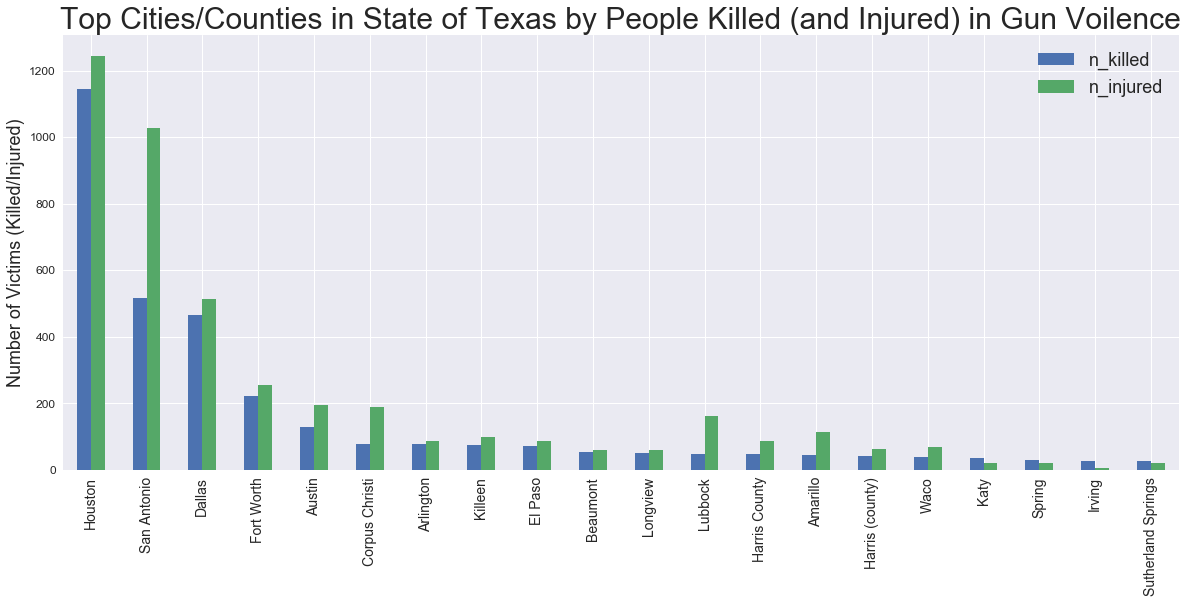

In [16]:
tex_city.head(20).plot(kind='bar',figsize=(20,8))
plt.ylabel('Number of Victims (Killed/Injured)',fontsize=18)
plt.xticks(fontsize=14);plt.yticks(fontsize=12)
plt.title("Top Cities/Counties in State of Texas by People Killed (and Injured) in Gun Voilence",fontsize=30)
plt.xlabel('')
plt.legend(fontsize=18)
plt.savefig("Incidents_Cities_Texas")

# Plots Involving Dates, Years of Incidences

In [17]:
df_date=df[['date']]

In [18]:
dayofmonth=[]
for index, row in df_date.iterrows():
    datesplit=row['date'].split('-')
    row['date']=datesplit[0]
#     dayofmonth.append(datesplit[1])
#     df_date.loc[index,'day of month']=datesplit[1]  #use .loc to add columns
#     df_date.loc[index,'day of week']=datesplit[2]
df_date.head()


,date
0,2013
1,2013
2,2013
3,2013
4,2013


In [19]:
df_year=(df_date['date'].value_counts()).to_frame()
# df_year.reset_index(drop=False)
df_year=df_year.rename(index={'2018': "2018 (3 Months Only)"})
df1_year=df_year.reindex(['2014','2015','2016','2017','2018 (3 Months Only)'])
df1_year
# df1.rename(index={1: 'a'})

,date
2014,51854
2015,53579
2016,58763
2017,61401
2018 (3 Months Only),13802


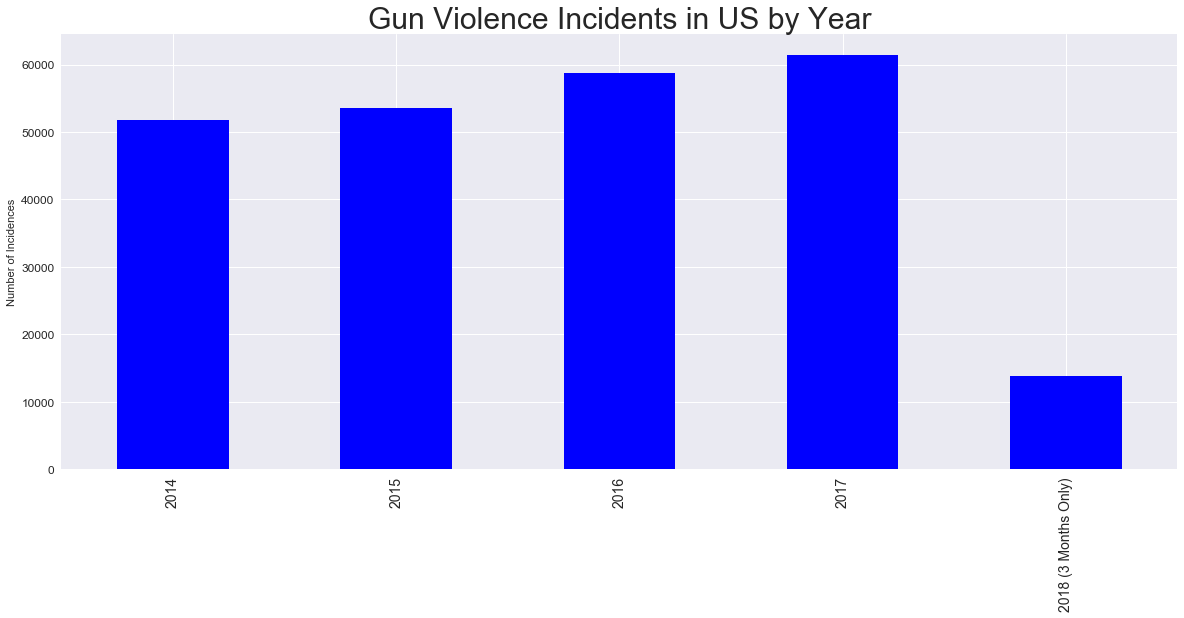

In [20]:

df1_year.plot(kind="bar",legend=False, figsize=(20,8), color='b')
plt.ylabel('Number of Incidences')
plt.xticks(fontsize=14);plt.yticks(fontsize=12)
plt.title("Gun Violence Incidents in US by Year",fontsize=30)
plt.savefig("Incidents_Years")

* There is a clear increase in gun voilence incidents for each year.
* Data plotted for 2018 is for three months only. 

# Relations to Gun Type

In [21]:
cols_needed = ['n_killed','n_injured','gun_type','n_guns_involved']
df_guns = df[cols_needed].dropna(axis=0)
df_guns.head()

,n_killed,n_injured,gun_type,n_guns_involved
2,1,3,0::Unknown||1::Unknown,2.0
4,2,2,0::Handgun||1::Handgun,2.0
6,5,0,0::22 LR||1::223 Rem [AR-15],2.0
10,1,3,0::Unknown,1.0
11,1,3,0::Unknown,1.0


In [22]:
gun_type={}
killed={}
injured={}
for index, row in df_guns.iterrows():
    firstsplit = row['gun_type'].split('|')
#     print(firstsplit)
    for element in firstsplit:
#         print(element)
        gun = element.split(':')[-1]
#         print(gun)
        if gun in gun_type:
            gun_type[gun]+=1
            killed[gun]+=row['n_killed']
            injured[gun]+=row['n_injured']
        else:
            gun_type[gun]=1
            killed[gun]=row['n_killed']
            injured[gun]=row['n_injured']
  

In [23]:
guns_killinj = pd.DataFrame([gun_type,killed,injured])
# guns_killinj.rename(columns={0:"Guns Involved"})
guns_killinj=guns_killinj.drop(columns=['','Unknown'])
guns_killinj1=guns_killinj.transpose()
guns_killinj2=guns_killinj1.rename(columns={0:"Guns Involved", 1:"People Killed", 2:"People Injured"})
guns_killinj2=guns_killinj2.sort_values('Guns Involved', ascending=False)
guns_killinj2.head()

,Guns Involved,People Killed,People Injured
Handgun,25050,3304,5700
9mm,6461,844,1241
Rifle,5271,672,882
Shotgun,4271,662,965
22 LR,3358,386,630


In [24]:
guns_killinj2.index

Index(['Handgun', '9mm', 'Rifle', 'Shotgun', '22 LR', '40 SW', '380 Auto',
       '45 Auto', '38 Spl', '223 Rem [AR-15]', '12 gauge', 'Other',
       '7.62 [AK-47]', '357 Mag', '25 Auto', '32 Auto', '20 gauge', '44 Mag',
       '30-30 Win', '410 gauge', '308 Win', '30-06 Spr', '10mm', '16 gauge',
       '300 Win', '28 gauge'],
      dtype='object')

In [25]:
guns_k = guns_killinj2.rename(index={'9mm':'Handgun', '40 SW':'Handgun', '380 Auto':'Handgun',
       '45 Auto':'Handgun', '38 Spl':'Handgun', '357 Mag':'Handgun', '25 Auto':'Handgun', '32 Auto':'Handgun', '44 Mag':'Handgun',
       '10mm':'Handgun',
        '22 LR':'Rifle','30-30 Win':'Rifle','308 Win':'Rifle', '30-06 Spr':'Rifle', '300 Win':'Rifle',
        '12 gauge':'Shotgun', '20 gauge':'Shotgun', '410 gauge':'Shotgun','16 gauge':'Shotgun', '28 gauge':'Shotgun',
        '223 Rem [AR-15]':'Assault Rifles','7.62 [AK-47]':'Assault Rifles'
                                    })
guns_k=guns_k.reset_index(drop=False)
guns_k_grped = guns_k.groupby('index').agg(np.sum)
# guns_k_grped=guns_k_grped.drop("Other",axis=0)
guns_k_grped=guns_k_grped.sort_values('Guns Involved',ascending=False)

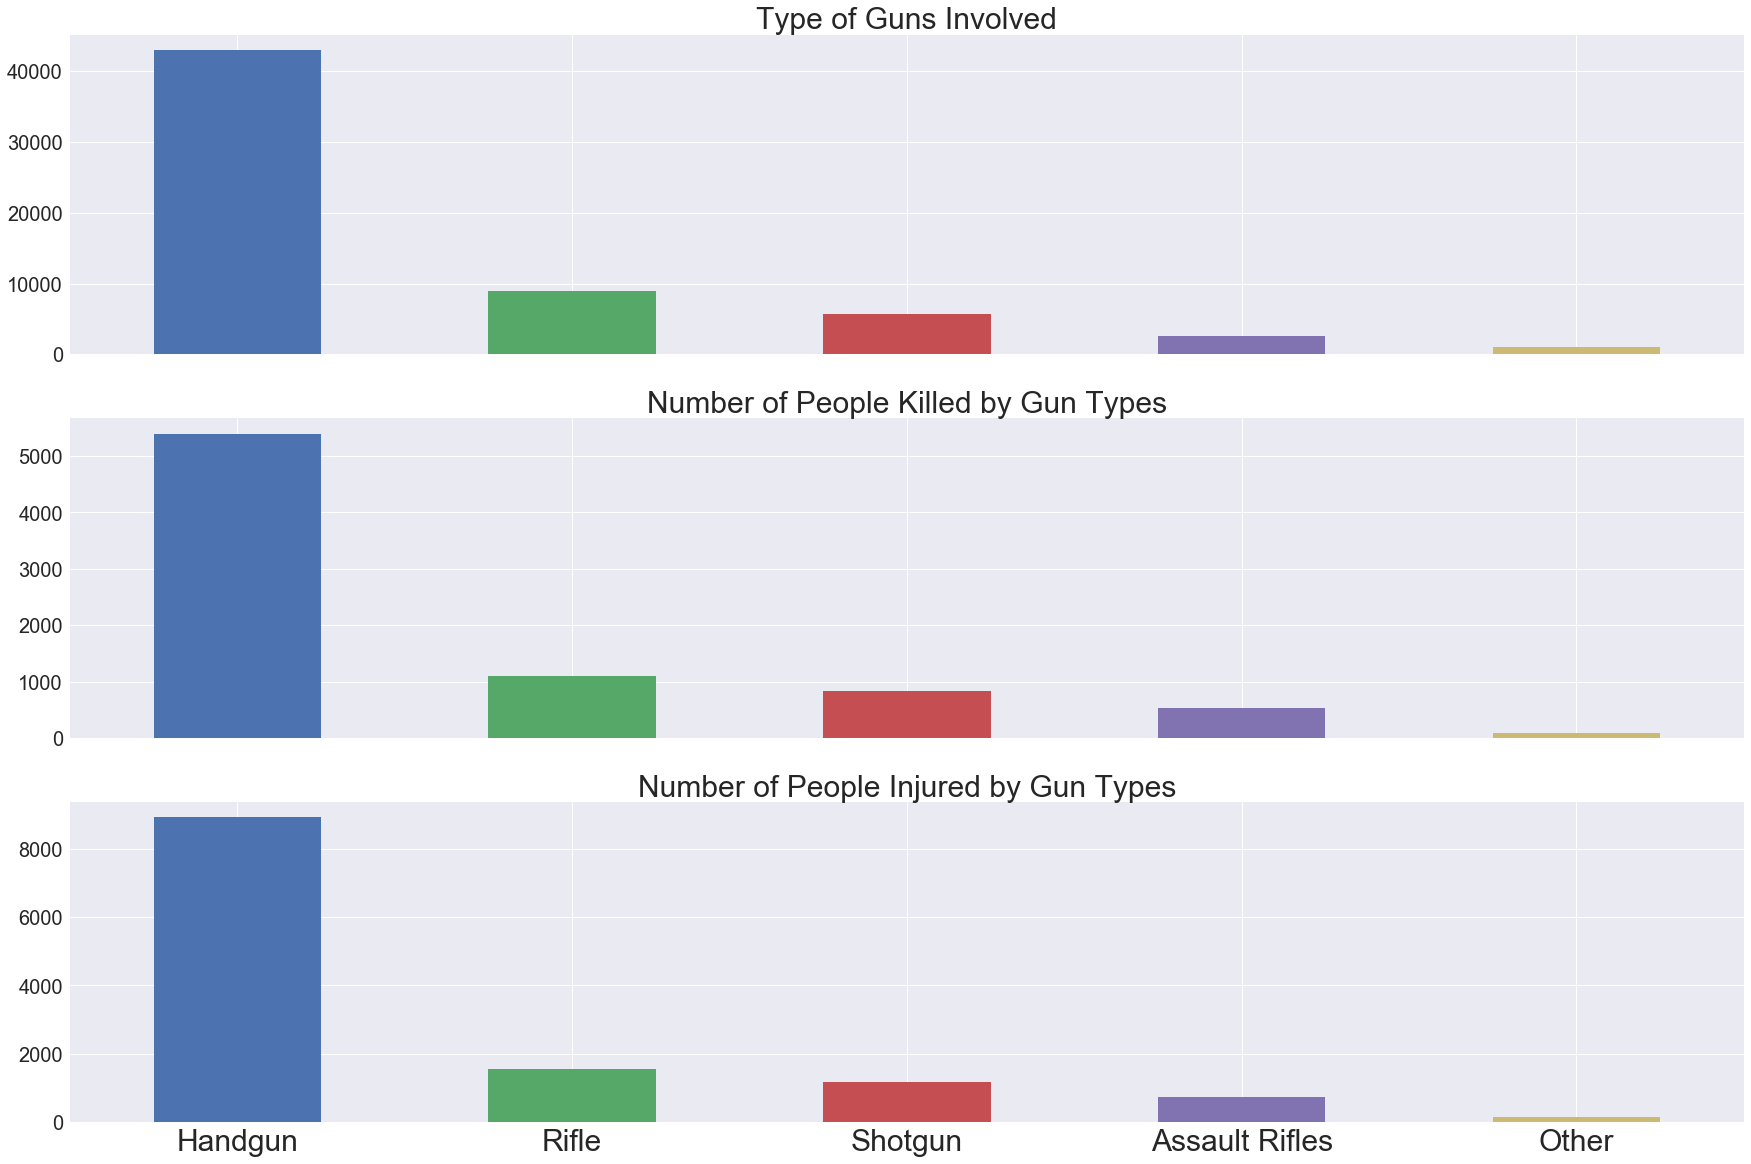

In [26]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(30,20))

guns_k_grped['Guns Involved'].plot(kind='bar', ax=ax1)
ax1.set_title('Type of Guns Involved', fontsize = 30)
# plt.yticks(fontsize=20)
guns_k_grped['People Killed'].plot(kind='bar', ax=ax2)
ax2.set_title('Number of People Killed by Gun Types', fontsize = 30)
guns_k_grped['People Injured'].plot(kind='bar', ax=ax3)
ax3.set_title('Number of People Injured by Gun Types', fontsize = 30)

ax1.tick_params(labelsize =20)
ax2.tick_params(labelsize =20)
ax3.tick_params(labelsize =20)

plt.tight_layout
plt.xticks(rotation=0,fontsize=30)
plt.xlabel('')
fig.get_tight_layout
# plt.yticks(fontsize=20)
plt.savefig("Incidents_guntypes")


# Gun Types Analysis for Each Year

In [27]:
print(df_date.head())
print(df[cols_needed].head())

   date
0  2013
1  2013
2  2013
3  2013
4  2013
   n_killed  n_injured                gun_type  n_guns_involved
0         0          4                     NaN              NaN
1         1          3                     NaN              NaN
2         1          3  0::Unknown||1::Unknown              2.0
3         4          0                     NaN              NaN
4         2          2  0::Handgun||1::Handgun              2.0


In [28]:
df_guntype=df_date.join(df[cols_needed])
df_guntype=df_guntype.dropna(axis=0)
df_guntype.head()

,date,n_killed,n_injured,gun_type,n_guns_involved
2,2013,1,3,0::Unknown||1::Unknown,2.0
4,2013,2,2,0::Handgun||1::Handgun,2.0
6,2013,5,0,0::22 LR||1::223 Rem [AR-15],2.0
10,2013,1,3,0::Unknown,1.0
11,2013,1,3,0::Unknown,1.0


In [29]:
def gun_type(df):
    gun_type={}
    killed={}
    injured={}
    for index, row in df.iterrows():
        firstsplit = row['gun_type'].split('|')
    #     print(firstsplit)
        for element in firstsplit:
    #         print(element)
            gun = element.split(':')[-1]
    #         print(gun)
            if gun in gun_type:
                gun_type[gun]+=1
                killed[gun]+=row['n_killed']
                injured[gun]+=row['n_injured']
            else:
                gun_type[gun]=1
                killed[gun]=row['n_killed']
                injured[gun]=row['n_injured']
    guns_killinj = pd.DataFrame([gun_type,killed,injured])
    # guns_killinj.rename(columns={0:"Guns Involved"})
    guns_killinj=guns_killinj.drop(columns=['','Unknown'])
    guns_killinj1=guns_killinj.transpose()
    guns_killinj2=guns_killinj1.rename(columns={0:"Guns Involved", 1:"People Killed", 2:"People Injured"})
    guns_killinj2=guns_killinj2.sort_values('Guns Involved', ascending=False)
#     guns_killinj2=guns_killinj2.transpose()
    guns_k = guns_killinj2.rename(index={'9mm':'Handgun', '40 SW':'Handgun', '380 Auto':'Handgun',
           '45 Auto':'Handgun', '38 Spl':'Handgun', '357 Mag':'Handgun', '25 Auto':'Handgun', '32 Auto':'Handgun', '44 Mag':'Handgun',
           '10mm':'Handgun',
            '22 LR':'Rifle','30-30 Win':'Rifle','308 Win':'Rifle', '30-06 Spr':'Rifle', '300 Win':'Rifle',
            '12 gauge':'Shotgun', '20 gauge':'Shotgun', '410 gauge':'Shotgun','16 gauge':'Shotgun', '28 gauge':'Shotgun',
            '223 Rem [AR-15]':'Assault Rifles','7.62 [AK-47]':'Assault Rifles'
                                        })
    guns_k=guns_k.reset_index(drop=False)
    guns_k_grped = guns_k.groupby('index').agg(np.sum)
    guns_k_grped=guns_k_grped.drop("Other",axis=0)
    guns_k_grped=guns_k_grped.sort_values('Guns Involved',ascending=False)
    return guns_k_grped

In [30]:
grpd_guns=df_guntype.groupby('date')
df_2014=gun_type(grpd_guns.get_group('2014'))
df_2015=gun_type(grpd_guns.get_group('2015'))
df_2016=gun_type(grpd_guns.get_group('2016'))
df_2017=gun_type(grpd_guns.get_group('2017'))
df_2018=gun_type(grpd_guns.get_group('2018'))


In [31]:
df_2017

,Guns Involved,People Killed,People Injured
index,,,
Handgun,12837,1436,2515
Rifle,2544,342,461
Shotgun,1720,211,326
Assault Rifles,864,147,202


In [32]:
gun_t=df_2014.index.tolist()
gun_t

['Handgun', 'Rifle', 'Shotgun', 'Assault Rifles']

<Figure size 3600x576 with 0 Axes>

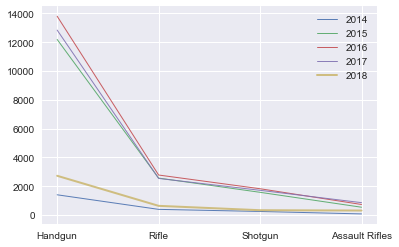

In [33]:
x_axis=np.arange(len(df_2014))
# fig, ax = plt.subplots()
# df_2014.plot(kind='line',x=x_axis, y='Guns Involved',ax=ax,marker='o')
# df_2015.plot(kind='line',x=x_axis,y='Guns Involved',ax=ax,marker='*')
# df_2016.plot(kind='line',x=x_axis,y='Guns Involved',marker='^')
# df_2017.plot(kind='line',x=x_axis,y='Guns Involved',marker='<')
# df_2018.plot(kind='line',x=x_axis,y='Guns Involved',marker='>')
# plt.show()
# plt.show(ax)
gun_t=df_2014.index.tolist()
plt.plot(x_axis,df_2014['Guns Involved'],linewidth=1, alpha=0.9, label='2014')
plt.plot(x_axis,df_2015['Guns Involved'],linewidth=1, alpha=0.9, label='2015')
plt.plot(x_axis,df_2016['Guns Involved'],linewidth=1, alpha=0.9, label='2016')
plt.plot(x_axis,df_2017['Guns Involved'],linewidth=1, alpha=0.9, label='2017')
plt.plot(x_axis,df_2018['Guns Involved'],linewidth=2, alpha=0.9, label='2018')
plt.xticks(x_axis,gun_t)
plt.legend()
plt.Figure(figsize=(50,8))

<Figure size 3600x576 with 0 Axes>

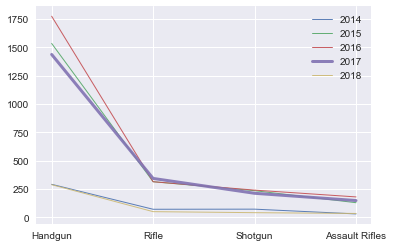

In [34]:
gun_t=df_2014.index.tolist()
plt.plot(x_axis,df_2014['People Killed'],linewidth=1, alpha=0.9, label='2014')
plt.plot(x_axis,df_2015['People Killed'],linewidth=1, alpha=0.9, label='2015')
plt.plot(x_axis,df_2016['People Killed'],linewidth=1, alpha=0.9, label='2016')
plt.plot(x_axis,df_2017['People Killed'],linewidth=3, alpha=0.9, label='2017')
plt.plot(x_axis,df_2018['People Killed'],linewidth=1, alpha=0.9, label='2018')
plt.xticks(x_axis,gun_t)
plt.legend()
plt.Figure(figsize=(50,8))

Curve (above) seems too cluttered hence not included


# Yearly Gun Type Data Barplots

In [35]:
# function for yearly gun type data bar plot
def gun_type_yearly(df,year):
    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(30,20))

    df['Guns Involved'].plot(kind='bar', ax=ax1)
    ax1.set_title(f'Type of Guns Involved in {year}', fontsize = 30)
    # plt.yticks(fontsize=20)
    df['People Killed'].plot(kind='bar', ax=ax2)
    ax2.set_title(f'Number of People Killed by Gun Types in {year}', fontsize = 30)
    df['People Injured'].plot(kind='bar', ax=ax3)
    ax3.set_title(f'Number of People Injured by Gun Types in {year}', fontsize = 30)

    ax1.tick_params(labelsize =20)
    ax2.tick_params(labelsize =20)
    ax3.tick_params(labelsize =20)

    plt.tight_layout
    plt.xticks(rotation=0,fontsize=30)
    plt.xlabel('')
    fig.get_tight_layout
    # plt.yticks(fontsize=20)
    plt.savefig(f"Incidents_guntypes_{year}.png")
    plt.show()

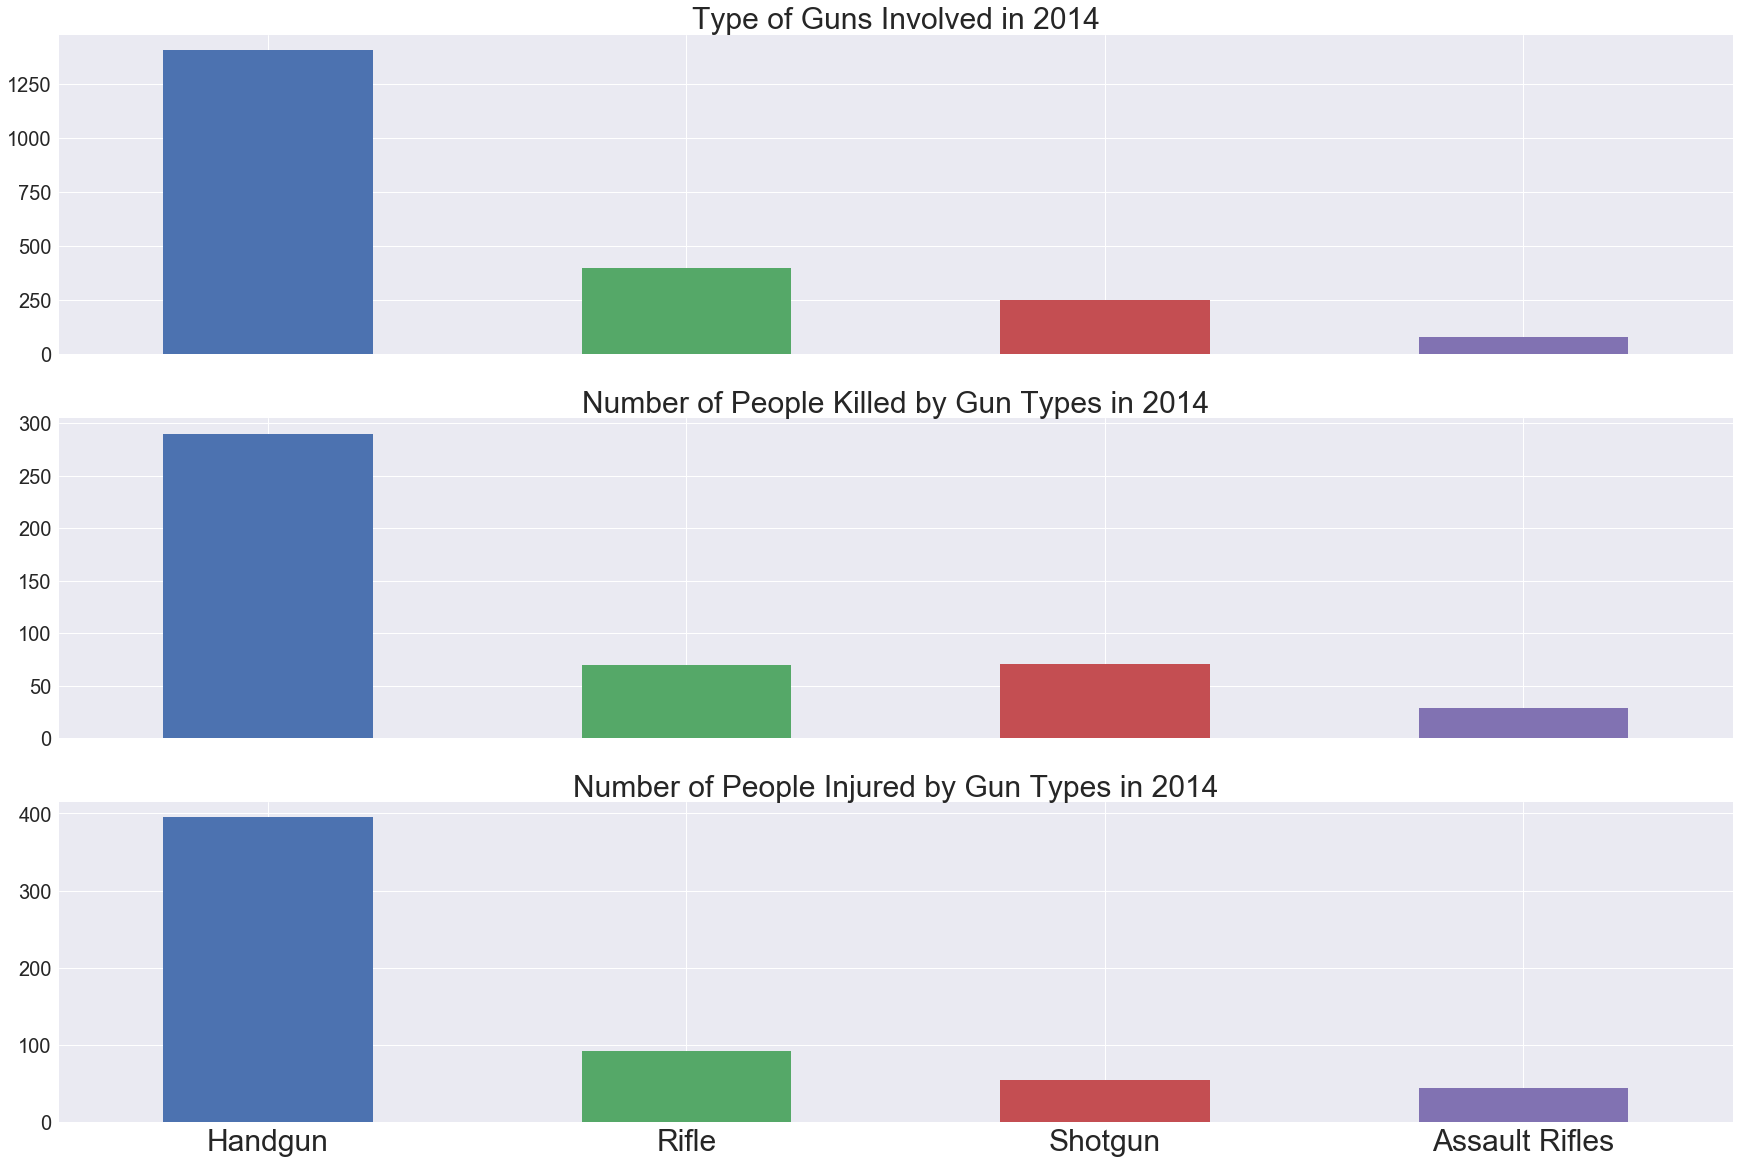

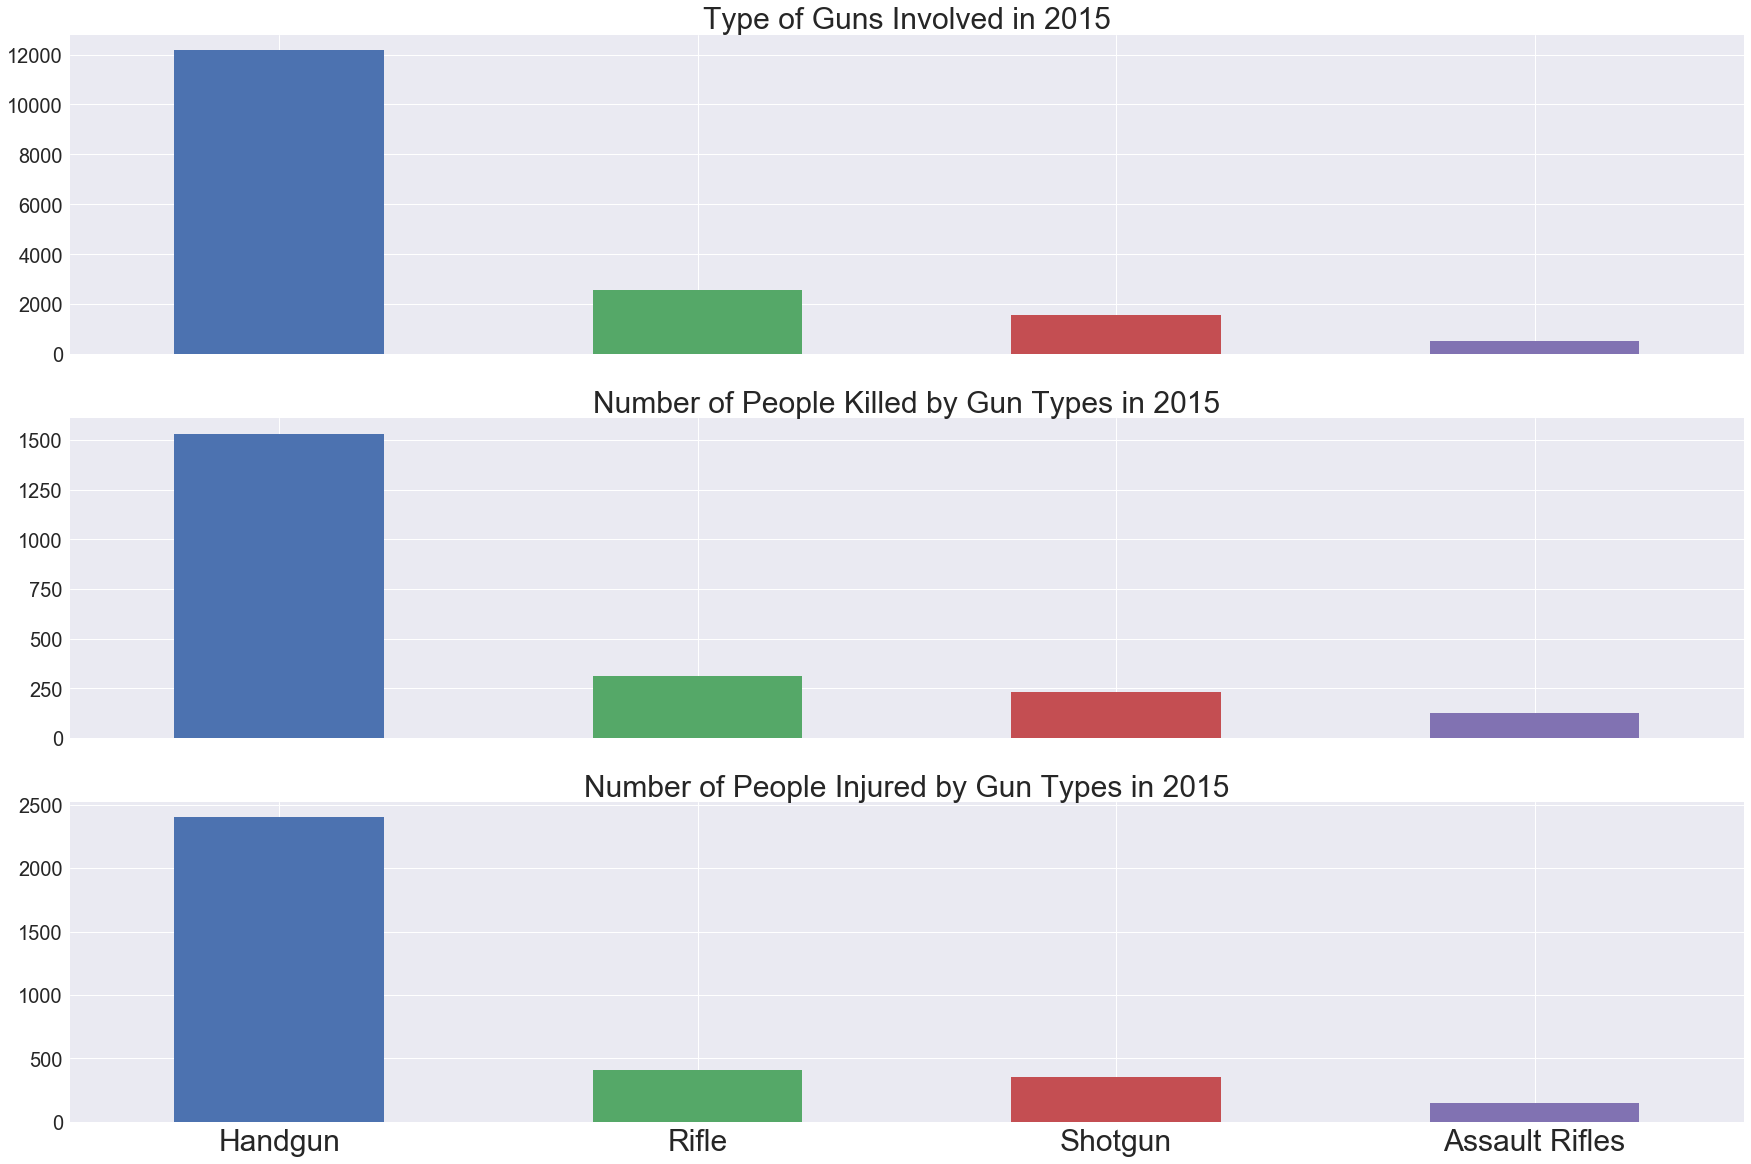

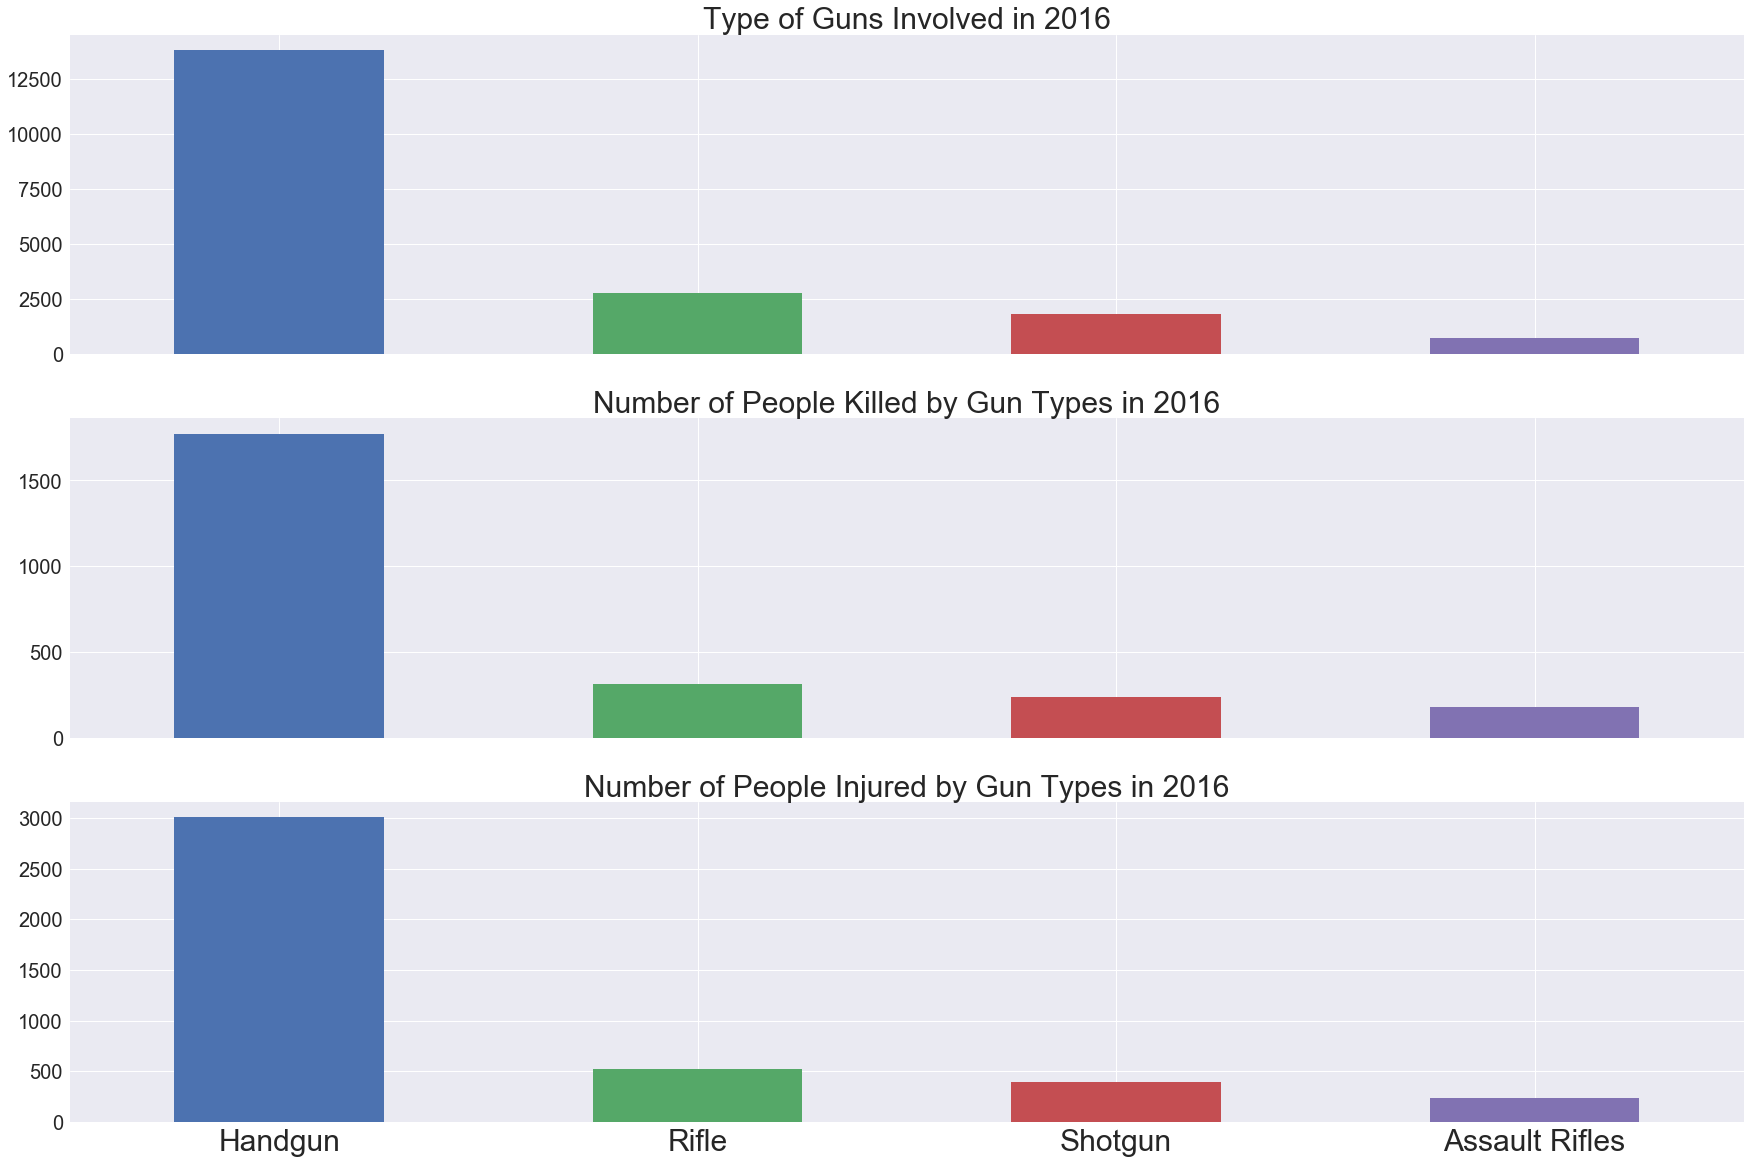

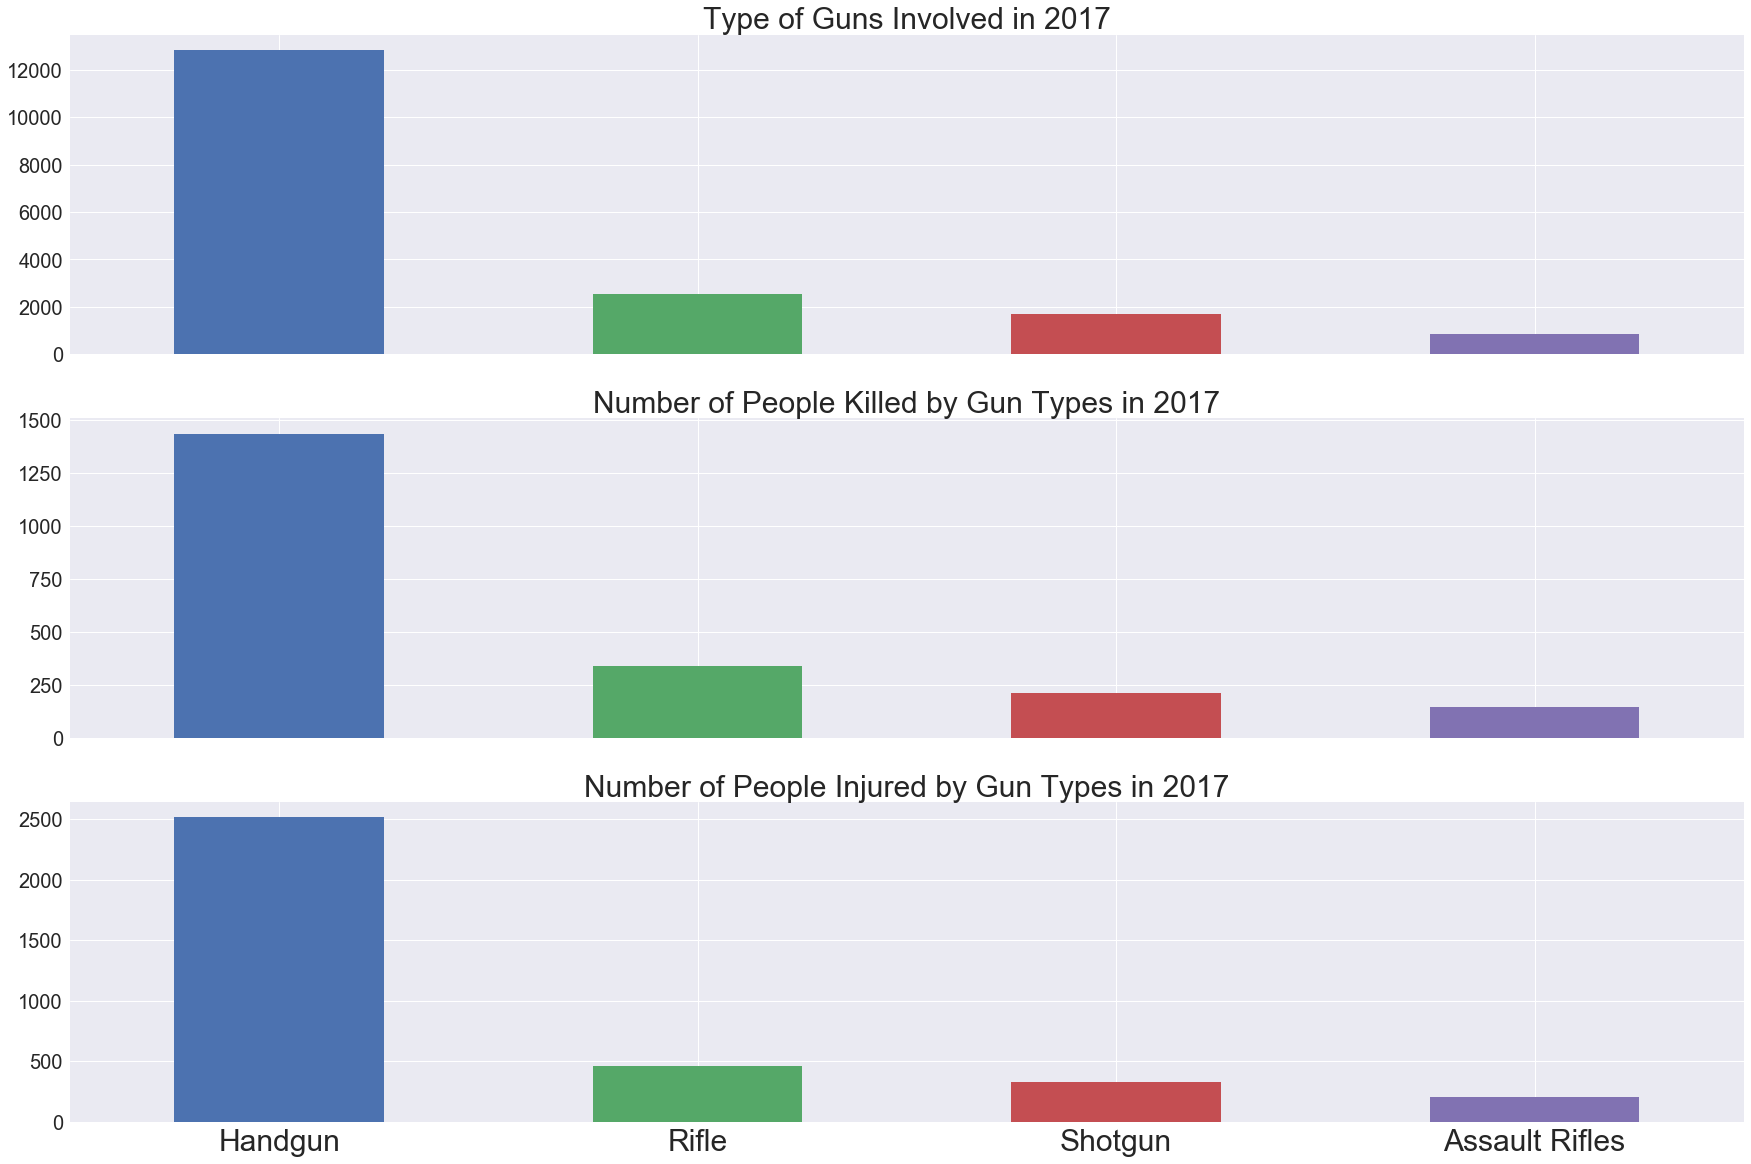

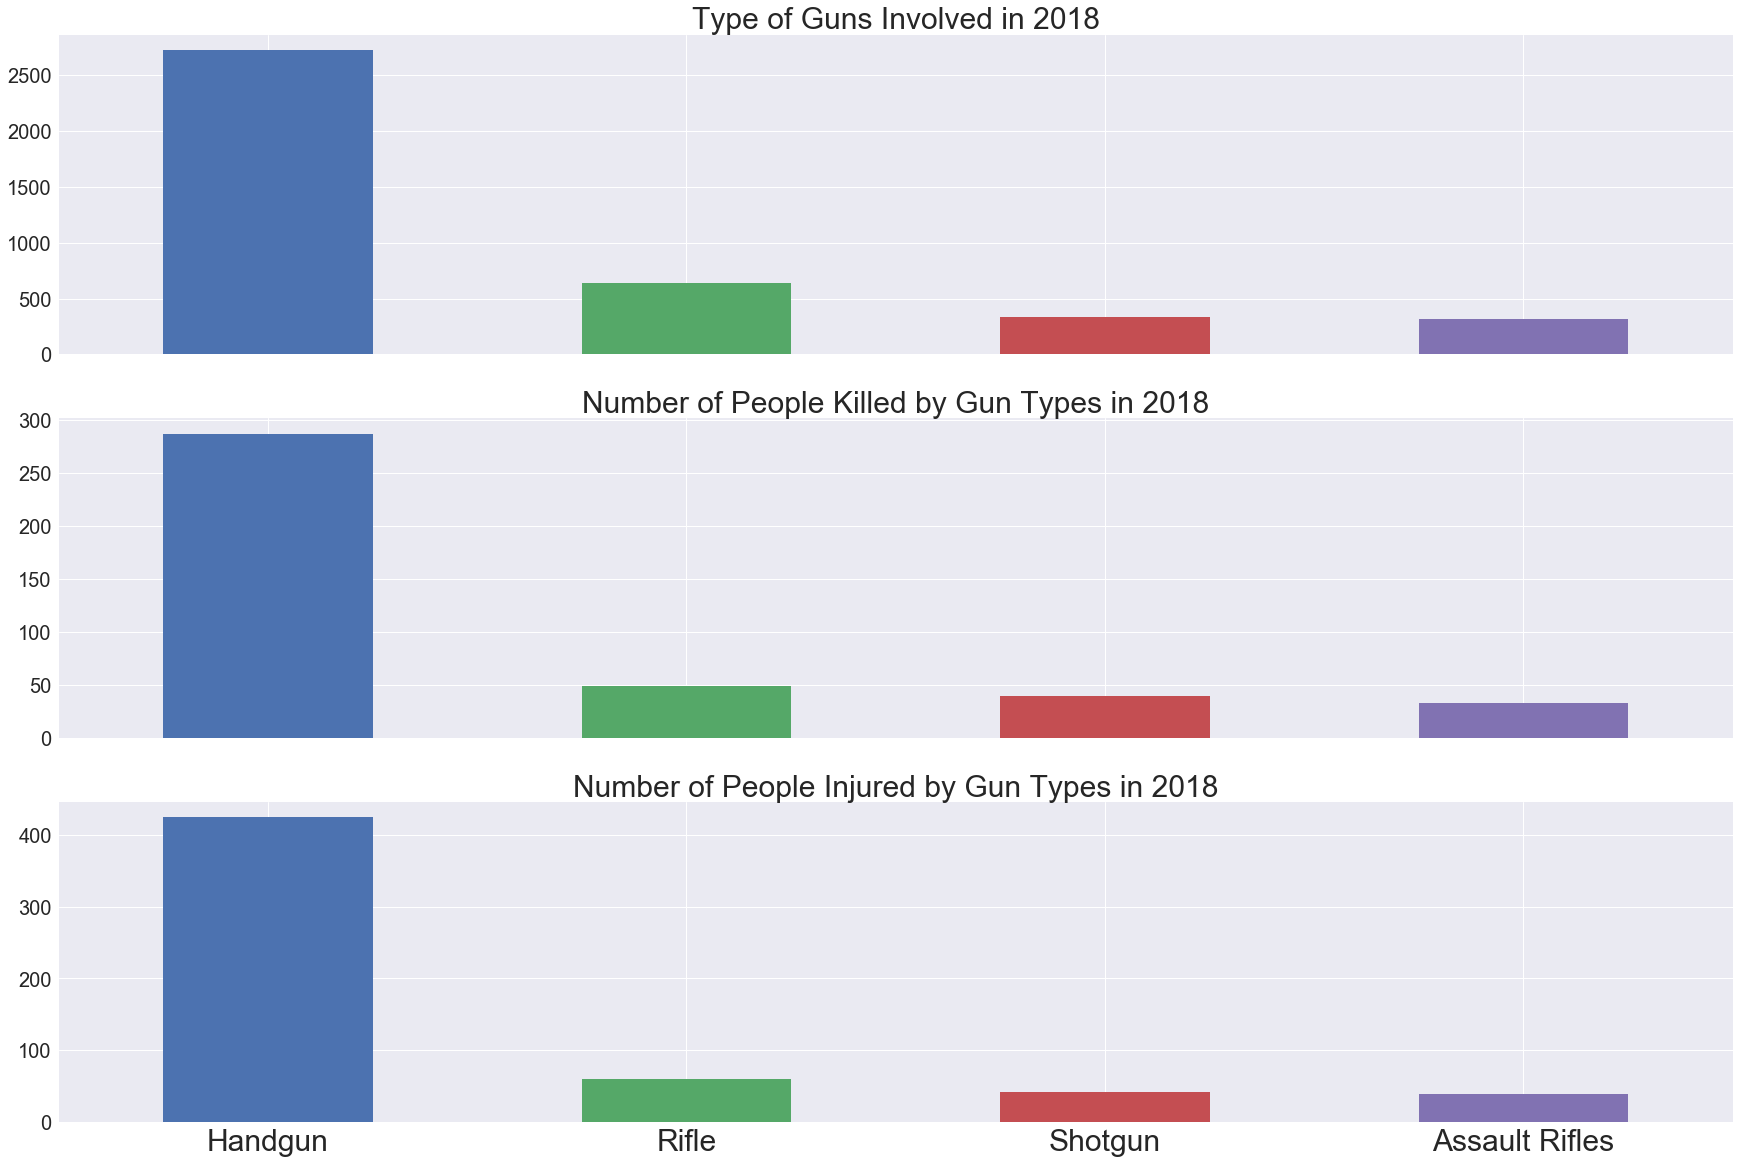

In [36]:
# Make barplots for every year
gun_type_yearly(df_2014, '2014')
gun_type_yearly(df_2015, '2015')
gun_type_yearly(df_2016, '2016')
gun_type_yearly(df_2017, '2017')
gun_type_yearly(df_2018, '2018')


#### Curve (Above) not included in the presentation

In [37]:
df_=pd.read_excel("../Dataset/Homicides_by_firearms.xls",sheet_name=2)

In [38]:
df_.head()

,Country/Territory,Variable,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Mauritius,"Homicide by firearm rate per 100,000 population",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.100000,NaN,NaN,NaN,NaN
1,Uganda,"Homicide by firearm rate per 100,000 population",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.257431,1.337130,NaN,1.283612,0.814110,1.119996,0.865054,NaN
2,Zambia,"Homicide by firearm rate per 100,000 population",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303419,0.279557,0.271160,0.263019,0.335683,0.247446,0.353677
3,Zimbabwe,"Homicide by firearm rate per 100,000 population",NaN,NaN,NaN,4.583362,4.804423,4.780376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Democratic Republic of the Congo,"Homicide by firearm rate per 100,000 population",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982645,1.014140,0.925954,1.121224,0.799974,1.089729,1.562154


In [39]:
df_2010 = df_[["Country/Territory", "2010"]]
df_2010.head()

,Country/Territory,2010
0,Mauritius,NaN
1,Uganda,NaN
2,Zambia,0.353677
3,Zimbabwe,NaN
4,Democratic Republic of the Congo,1.562154


In [40]:
df_2010 = df_2010.dropna(axis=0)

* 17 countries left

In [41]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 107
Data columns (total 2 columns):
Country/Territory    17 non-null object
2010                 17 non-null float64
dtypes: float64(1), object(1)
memory usage: 408.0+ bytes


In [42]:
df_2010.head()

,Country/Territory,2010
2,Zambia,0.353677
4,Democratic Republic of the Congo,1.562154
8,Liberia,0.425625
14,Dominican Republic,16.298457
15,Grenada,0.000000


In [43]:
# df_2010=df_2010.sort_values('2010', ascending=True)
df_2010['number']=np.arange(len(df_2010))
df_2010.head()

,Country/Territory,2010,number
2,Zambia,0.353677,0
4,Democratic Republic of the Congo,1.562154,1
8,Liberia,0.425625,2
14,Dominican Republic,16.298457,3
15,Grenada,0.000000,4


<Figure size 3600x1800 with 0 Axes>

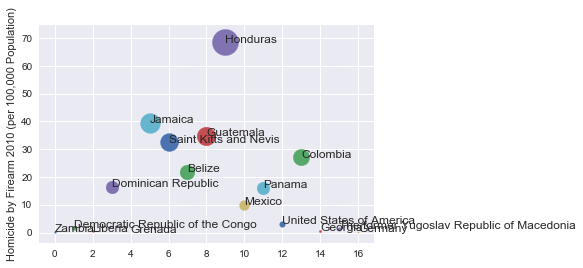

<Figure size 3600x1800 with 0 Axes>

In [44]:
#df_2010.set_index('Country/Territory')
fig,ax=plt.subplots()

for key, row in df_2010.iterrows():
    ax.scatter(row['number'], row['2010'], s=row['2010']*10,)
    ax.annotate(row['Country/Territory'], xy=(row['number'], row['2010']))
# df_2010.plot(kind="scatter",x="number", y="2010", edgecolor='black', color='green',s=75, ax=ax,)
plt.ylabel('Homicide by Firearm 2010 (per 100,000 Population)')
plt.xlabel('')
plt.figure(figsize=(50,25))
# fig, ax = plt.subplots()
# df[df['Country'] == 'Bhutan'].plot(x='Year', y='GDP_per_capita', ax=ax, legend=False)

# fig, ax = plt.subplots(facecolor='w')

# for key, row in df.iterrows():
#     ax.scatter(row['x'], row['y'], s=row['s']*5, alpha=.5)
#     ax.annotate(row['users'], xy=(row['x'], row['y']))



#### Curve not depicting any useful information about gun violence in USA so not included in the presentation